In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 829.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0

In [3]:
%env TF_ENABLE_ONEDNN_OPTS=0

env: TF_ENABLE_ONEDNN_OPTS=0


In [4]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [5]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

2023-12-18 15:44:22.697172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 15:44:22.697231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 15:44:22.699087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('../input/diabetic-retinopathy-224x224-grayscale-images/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     color_mode = 'grayscale',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('../input/diabetic-retinopathy-224x224-grayscale-images/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     color_mode = 'grayscale',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [7]:
!pip install --upgrade pip

In [8]:
!pip install -q efficientnet

In [9]:
import efficientnet.tfkeras as efn

In [10]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [11]:
import tensorflow as tf


from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model with a single-channel input
input_layer = Input(shape=(224, 224, 1))
x = Concatenate()([input_layer, input_layer, input_layer])  # Duplicate the single-channel input into three channels
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output_layer = Dense(5, activation='softmax')(x)

# Create the final model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 [==============================] - 0s 0us/step


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 224, 224, 3)          0         ['input_2[0][0]',             
                                                                     'input_2[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 efficientnetb0 (Functional  (None, 7, 7, 1280)           4049571   ['concatenate[0][0]']         
 )                                                                                            

In [14]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=20,verbose=1)

Epoch 1/20
92/92 [==============================] - 134s 1s/step - loss: 3.2751 - accuracy: 0.6435 - val_loss: 3.9718 - val_accuracy: 0.0848 - lr: 1.0000e-04
Epoch 2/20
92/92 [==============================] - 121s 1s/step - loss: 3.0922 - accuracy: 0.7008 - val_loss: 4.2133 - val_accuracy: 0.1477 - lr: 1.0000e-04
Epoch 3/20
92/92 [==============================] - 127s 1s/step - loss: 2.9320 - accuracy: 0.7247 - val_loss: 3.8539 - val_accuracy: 0.3653 - lr: 1.0000e-04
Epoch 4/20
92/92 [==============================] - 122s 1s/step - loss: 2.8168 - accuracy: 0.7363 - val_loss: 3.9645 - val_accuracy: 0.4897 - lr: 1.0000e-04
Epoch 5/20
92/92 [==============================] - 125s 1s/step - loss: 2.6866 - accuracy: 0.7588 - val_loss: 98.6785 - val_accuracy: 0.1012 - lr: 1.0000e-04
Epoch 6/20
92/92 [==============================] - 124s 1s/step - loss: 2.5651 - accuracy: 0.7782 - val_loss: 3.9903 - val_accuracy: 0.4897 - lr: 1.0000e-04
Epoch 7/20
92/92 [==============================] -

In [15]:
test_data = datagen.flow_from_directory('../input/diabetic-retinopathy-224x224-grayscale-images/grayscale_images/grayscale_images',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     color_mode = 'grayscale',
                                                     subset = 'validation')

Found 731 images belonging to 5 classes.


In [16]:
evaluation_result = model.evaluate(test_data,verbose=1)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

23/23 [==============================] - 7s 286ms/step - loss: 2.1501 - accuracy: 0.5390
Test Loss: 2.1501305103302
Test Accuracy: 0.5389876961708069


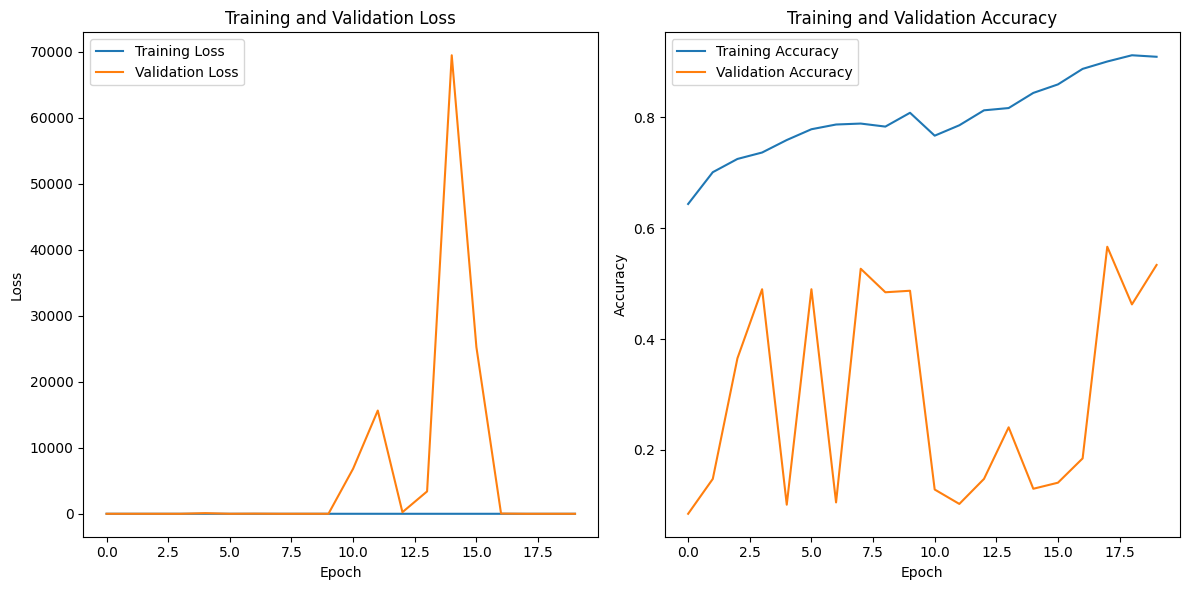

In [18]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()